In [ ]:
# Reference: https://github.com/UBC-CS/cpsc330-2021W2/blob/main/lectures/04_kNNs-SVM-RBF.ipynb

In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# read in kNN subset
kNN_star_sub = pd.read_csv ('/Users/apple/Desktop/LastTerm_UBC_2022_W2/STAT447B/GroupProject/kNN_data/kNN_PhaseA_star_subset.csv')

In [3]:
#print colnmaes
list(kNN_star_sub.columns)

['Unnamed: 0',
 'obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID',
 'cam_col',
 'fieldbin',
 'runbin',
 'class']

In [4]:
# ordianl feature orders
cam_col_levels = [1, 2, 3, 4, 5, 6]
fieldbin_levels = ["(-1.18,-0.774]", "(-0.774,-0.45]", "(-0.45,-0.06]", "(-0.06,0.58]", "(0.58,5.4]"]
runbin_levels = ["(-2.23,-0.831]", "(-0.831,-0.327]", "(-0.327,0.048]", "(0.048,0.8]", "(0.8,1.9]"]

In [5]:
# feature category
numerical = ["obj_ID", "alpha", "delta","u","g","r","i","z", 'run_ID', 'spec_obj_ID', 'redshift', 'plate','MJD', 'fiber_ID']
ordinal = ["cam_col", "fieldbin", "runbin"]
target = "class"


In [6]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

preprocessor = make_column_transformer(
    (
        make_pipeline(SimpleImputer(), StandardScaler()),
        numerical,
    ),  # scaling on numeric features
    (
        OrdinalEncoder(categories=[cam_col_levels, fieldbin_levels, runbin_levels], dtype = float ),
        ordinal,
    ),  # Ordinal encoding on ordinal features
   # ("passthrough", passthrough_feats),  # no transformations on the binary features
   # ("drop", drop_feats),  # drop the drop features
)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r',
                                  'i', 'z', 'run_ID', 'spec_obj_ID', 'redshift',
                                  'plate', 'MJD', 'fiber_ID']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[[1, 2, 3, 4, 5, 6],
                                                            ['(-1.18,-0.774]',
                                                             '(-0.774,-0.45]',
                                                             '(-0.45,-0.06]',
                                                             '(-0.06,0.58]',
               

In [7]:
# kNN_star_sub.head()

In [8]:
X_star = kNN_star_sub.iloc[:,1:18]

In [9]:
y_star = kNN_star_sub["class"]

In [10]:
X_transformed = preprocessor.fit_transform(X_star)

new_column_names = (
    numerical
    + ordinal
)


In [11]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [12]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# define the model
model = KNeighborsClassifier()

# fit the model
model.fit(X_transformed, y_star)

# perform permutation importance
results = permutation_importance(model, X_transformed, y_star, scoring='accuracy')
# get importance
importance = results.importances_mean

Feature: 0, Score: 0.00558
Feature: 1, Score: 0.01244
Feature: 2, Score: 0.01750
Feature: 3, Score: 0.04730
Feature: 4, Score: 0.02742
Feature: 5, Score: 0.00664
Feature: 6, Score: 0.01570
Feature: 7, Score: 0.03144
Feature: 8, Score: 0.00558
Feature: 9, Score: 0.01148
Feature: 10, Score: 0.14909
Feature: 11, Score: 0.01146
Feature: 12, Score: 0.03480
Feature: 13, Score: 0.01296
Feature: 14, Score: 0.03392
Feature: 15, Score: 0.03104
Feature: 16, Score: 0.02850


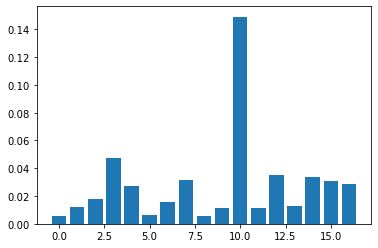

In [13]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

By plot, feature index 3, 4, 7, 10, 12, 14, 15, 16<br>
They are u, g, z, redshift, MJD, camcol, fieldbin and runbin<br>
These features will be selected for kNN.